### Câu 1 : Tạo dataframe(df) lưu trữ dataset tại đường dẫn trên( chọn cách đọc load từ internet). Xuất 10 samples bất kỳ. Dataset có bao nhiêu samples, số lượng bao nhiêu feature.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline


url = 'https://raw.githubusercontent.com/datasethub/ds105/master/Lab_Model_Development.csv'
df = pd.read_csv(url)
df.sample(10)

,curb-weight,engine-size,length,width,horsepower,city-mpg,highway-mpg,wheel-base,bore,price
126,2579,132,0.872177,0.923611,104.256158,23,31,96.1,3.46,9295.0
22,2128,98,0.755887,0.886111,102.000000,24,30,93.7,3.03,7957.0
115,1918,90,0.755887,0.886111,68.000000,37,41,93.7,2.97,5572.0
99,3296,181,0.887074,0.923611,152.000000,17,22,100.4,3.43,14399.0
109,3252,152,0.897165,0.950000,95.000000,28,33,107.9,3.70,16900.0
44,4066,258,0.959154,0.966667,176.000000,15,19,113.0,3.63,32250.0
45,4066,258,0.959154,0.966667,176.000000,15,19,113.0,3.63,35550.0
147,2040,92,0.762614,0.883333,62.000000,31,38,95.7,3.05,6338.0
6,2844,136,0.925997,0.991667,110.000000,19,25,105.8,3.19,17710.0
88,1918,97,0.794330,0.886111,69.000000,31,37,94.5,3.15,6649.0


In [2]:
df.shape

(201, 10)

Dataset có 201 samples và 9 featrue

### Câu 2 : Kiểm tra kiểu dữ liệu của các feature ('curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore') trong dataset có bị khuyết giá trị nào không?

In [3]:
df_2 = df.copy()

In [4]:
df_2 = df_2[['curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore']]

In [5]:
df_2.dtypes

curb-weight      int64
engine-size      int64
length         float64
width          float64
horsepower     float64
city-mpg         int64
highway-mpg      int64
wheel-base     float64
bore           float64
dtype: object

In [6]:
df_2.isnull().sum()

curb-weight    0
engine-size    0
length         0
width          0
horsepower     0
city-mpg       0
highway-mpg    0
wheel-base     0
bore           0
dtype: int64

In [7]:
for col in range(0, len(df.columns)):
    print(df[df.columns[col]].unique())
    print("----------------------")

[2548 2823 2337 2824 2507 2844 2954 3086 2395 2710 2765 3055 3230 3380
 3505 1488 1874 1909 1876 2128 1967 1989 2191 2535 2811 1713 1819 1837
 1940 1956 2010 2024 2236 2289 2304 2372 2465 2293 2734 4066 3950 1890
 1900 1905 1945 1950 2380 2385 2500 2410 2443 2425 2670 2700 3515 3750
 3495 3770 3740 3685 3900 3715 2910 1918 1944 2004 2145 2370 2328 2833
 2921 2926 2365 2405 2403 1889 2017 1938 1951 2028 1971 2037 2008 2324
 2302 3095 3296 3060 3071 3139 3020 3197 3430 3075 3252 3285 3485 3130
 2818 2778 2756 2800 2579 2460 2658 2695 2707 2758 2808 2847 2050 2120
 2240 2190 2340 2510 2290 2455 2420 2650 1985 2040 2015 2280 3110 2081
 2109 2275 2094 2122 2140 2169 2204 2265 2300 2540 2536 2551 2679 2714
 2975 2326 2480 2414 2458 2976 3016 3131 3151 2261 2209 2264 2212 2319
 2254 2221 2661 2563 2912 3034 2935 3042 3045 3157 2952 3049 3012 3217
 3062]
----------------------
[130 152 109 136 131 108 164 209  61  90  98 122 156  92  79 110 111 119
 258 326  91  70  80 140 134 183 234 308 304 

Dataset không bị khuyết giá trị nào

### Câu 3 : Phát triển mô hình Polynomial Regression bậc 3 để dự đoán giá xe từ biến 'highway-mpg' (tên mô hình poly)

In [8]:
df_3 = df.copy()

In [9]:
SC_3 = StandardScaler()
poly_3 = PolynomialFeatures(degree = 3, include_bias = False)
model_3 = LinearRegression()

X = df_3[['highway-mpg']]
y = df_3['price']

X_normalize_3 = SC_3.fit_transform(X)
X_poly_3 = poly_3.fit_transform(X_normalize_3)
model_3 = model_3.fit(X_poly_3, y)

In [10]:
model_3.intercept_, model_3.coef_

(10633.909632655192, array([-5414.86144666,  2839.95364473,  -489.06305899]))

### Câu 4 : Tính MSE và R^2 để đánh giá tập mẫu của mô hình trên bằng phương pháp thủ công và gọi hàm. Phát họa distribution plot để đánh giá mô hình.

In [11]:
SC_4 = StandardScaler()

Sử dụng feature 'highway-mpg' để predict

In [12]:
X_sample_4 = np.array(df[['highway-mpg']])

Normalize X_sample bằng phương thức StandardScaler

In [13]:
X_normalize_4 = SC_4.fit_transform(X_sample_4.reshape(-1, 1))

Tiếp tục bước transform sử dụng PolynomialFeatures

In [14]:
X_poly_4 = PolynomialFeatures(degree = 3, include_bias = False).fit_transform(X_normalize_4)

Khởi tạo y_pred_4

In [15]:
y_pred_4 = model_3.predict(X_poly_4)

Khởi tạo y

In [16]:
y = df['price']

Mean squared error

In [17]:
MSE_4 = np.sum((y - y_pred_4)**2 / df.shape[0])
MSE_4

20474146.426361218

In [18]:
MSE_4_func = mean_squared_error(y, y_pred_4)
MSE_4_func

20474146.426361218

In [19]:
MSE_average_4 = np.sum((y - y.mean())**2 / df.shape[0])
MSE_average_4

62841655.16734734

In [20]:
arr_mean = []
for i in range(0, len(y)):
    arr_mean.append(y.mean())
df_mean = pd.DataFrame(arr_mean)

In [21]:
MSE_average_4_func = mean_squared_error(y, df_mean)
MSE_average_4_func

62841655.16734734

R2

In [22]:
R2_4 = 1 - (MSE_4 / MSE_average_4)
R2_4

0.6741946663906518

In [23]:
R2_4_func = model_3.score(X_poly_4, y)
R2_4_func

0.674194666390652

Phát họa distribution plot

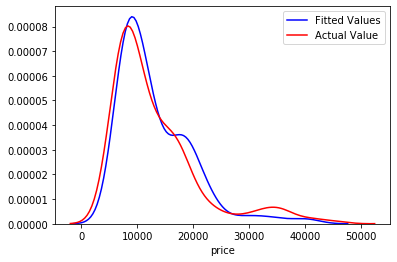

In [24]:
ax1 = sns.distplot(y_pred_4, hist=False, color='b', label = 'Fitted Values')
sns.distplot(y, hist=False, color='r', label = 'Actual Value', ax=ax1)
plt.show()

### Câu 5 : Phát triển mô hình hồi quy tuyến tính đa biến để dự đoán giá xe từ biến 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'

In [25]:
df_5 = df.copy()

Xây dựng mô hình

In [26]:
X_5 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y_5 = df['price']
    

In [27]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

SC_5 = StandardScaler()
poly_5 = PolynomialFeatures(degree = 3, include_bias = False)
model_5 = LinearRegression()
    
X_normalize_5 = SC_5.fit_transform(X_5)
X_poly_5 = poly_5.fit_transform(X_normalize_5)
model_5 = model_5.fit(X_poly_5, y)

In [28]:
model_5.intercept_, model_5.coef_

(11017.942627946732,
 array([-1013.99425222,  4273.46228485,   941.28452416, -1434.04556364,
          567.7377404 ,  4806.00412443, -9092.29030358,  1228.30822399,
         1653.88129233, -8830.36316909,  -521.42990708, 12690.67535588,
        -1958.43431511,   355.04691316,  2014.92478845, -4698.06374757,
         2819.7562693 ,  3848.87880404,  -656.84952557,  6272.43541319,
        -5994.13257902, -4249.88376111,   873.6644639 ,  1023.22920693,
         -744.32042846,  4544.60993274,   372.29176059, -6940.17848163,
         2270.10224362,  -832.69618728,  2519.16799238,  2104.72575599,
         2796.82223486,   568.87826921]))

Normalize và Transform

In [29]:
X_sample_5 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [30]:

X_normalize_sample_5 = SC_5.fit_transform(X_sample_5)
X_poly_sample_5 = poly_5.fit_transform(X_normalize_sample_5)
    
y_pred_5 = model_5.predict(X_poly_sample_5)

In [31]:
y_pred_5

array([11544.20557153, 11544.20557153, 14114.40410279,  9809.88877397,
       15947.36094342, 12695.09759977, 15371.14796858, 16485.90740748,
       20774.11530048, 10615.15373339, 10615.15373339, 18162.54235774,
       18001.823445  , 20020.50831758, 24965.95315383, 26569.42112073,
       29610.7247565 ,  5758.77037293,  5819.98692554,  6169.51076992,
        5617.93020768,  5970.62103412,  8830.59598737,  6947.34274077,
        7195.4383421 ,  7195.4383421 ,  9836.39262307, 10972.61628903,
       14708.19101592,  6191.16202556,  5795.47773936,  7075.44147026,
        7070.41148032,  7250.64288791,  7873.60390064,  8038.37628199,
        8402.44421861,  8814.79816327,  8937.0396306 ,  9517.68359781,
       11192.10394758,  9157.89066051,  9164.99874745, 12433.54042412,
       35496.1727674 , 35496.1727674 , 37188.68536501,  6112.34862155,
        6036.03589397,  6086.01634975,  6496.06428557,  6548.53486814,
       12961.81819656, 12961.81819656, 13051.30728607, 13607.73821477,
      

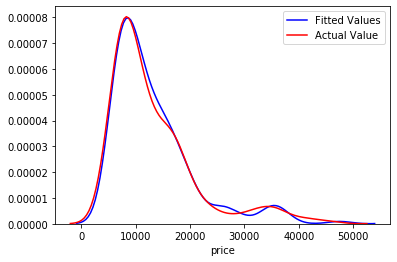

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
ax2 = sns.distplot(y_pred_5, hist=False, color='b', label = 'Fitted Values')
sns.distplot(y, hist=False, color='r', label = 'Actual Value', ax=ax2)
plt.show()

### Câu 6 : Tính MSE và R^2 để đánh giá tập mẫu của mô hình trên bằng phương pháp thủ công và gọi hàm. Phát họa distribution plot để đánh giá mô hình.

In [33]:
df_6 = df.copy()

Định nghĩa hàm tính MSE

In [34]:
def mse_6(y, yhat, df):
    mse = np.sum((yhat - y)**2 / df.shape[0])
    return mse

Tính MSE

In [35]:
MSE_6 = mse_6(y, y_pred_5, df_6)
MSE_6

6578339.0826046895

In [36]:
MSE_6_func = mean_squared_error(y, y_pred_5)
MSE_6_func

6578339.0826046895

In [37]:
MSE_average_6 = mse_6(y, y.mean(), df_6)
MSE_average_6

62841655.16734734

In [38]:
MSE_average_6_func = mean_squared_error(y, df_mean)
MSE_average_6_func

62841655.16734734

Tính R2

In [39]:
R2_6 = 1 - (MSE_6 / MSE_average_6)
R2_6

0.8953188125760442

In [40]:
R2_6_func = model_5.score(X_poly_sample_5, y)
R2_6_func

0.8953188125760442

### Câu 7 : Phát triển mô hình Polynomial Regression bậc 2 để dự đoán giá xe từ biến 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'.

In [41]:
df_7 = df.copy()

Chọn tập dữ liệu train

In [42]:
X_7 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

Khởi tạo mô hình

In [43]:
SC_7 = StandardScaler()
poly_7 = PolynomialFeatures(degree = 2, include_bias = False)
model_7 = LinearRegression()
    
X_normalize_7 = SC_7.fit_transform(X_7)
X_poly_7 = poly_7.fit_transform(X_normalize_7)
model_7 = model_7.fit(X_poly_7, y)

Dự đoán tập mẫu

In [44]:
y_pred_7 = model_7.predict(X_poly_7)
y_pred_7

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385, 10510.56542385, 15845.70697835,
       16068.03816037, 18547.43547305, 25222.41976123, 25176.06409341,
       26518.01037743,  5896.19728097,  6225.67595805,  6265.22601565,
        5976.20889391,  5832.72306295, 10109.23396371,  6061.05969767,
        6118.14411398,  6118.14411398, 10042.92800648, 11301.10641037,
       18336.04622938,  7336.72885437,  6420.49643279,  5174.21296336,
        6619.35236359,  6652.09244229,  6765.45204951,  6795.56233742,
        8796.64497511,  8948.23637645,  8991.91184621,  9194.18038695,
       10928.27635866, 10052.96792101,  9660.68466801, 12124.39546671,
       36318.61803898, 36318.61803898, 41642.8179005 ,  5912.27956733,
        5928.15567673,  5941.11734652,  6046.17348651,  6059.47585172,
       10195.17246527, 10195.17246527, 10183.58560528, 15943.91103394,
      

### Câu 8 : Tính MSE và R^2 để đánh giá tập mẫu của mô hình trên bằng phương pháp thủ công và gọi hàm. Phát họa distribution plot để đánh giá mô hình.

In [45]:
df_8 = df.copy()

Tính MSE

In [46]:
MSE_8 = mse_6(y, y_pred_7, df_8)
MSE_8

9656613.4039896

In [47]:
MSE_8_func = mean_squared_error(y, y_pred_7)
MSE_8_func

9656613.4039896

In [48]:
MSE_average_8 = mse_6(y, y.mean(), df_8)
MSE_average_8

62841655.16734734

In [49]:
MSE_average_8_func = mean_squared_error(y, df_mean)
MSE_average_8_func

62841655.16734734

Tính R^2

In [50]:
R2_8 = 1 - (MSE_8 / MSE_average_8)
R2_8

0.8463341969864728

In [51]:
R2_8_func = model_7.score(X_poly_7, y)
R2_8_func

0.8463341969864728

### Câu 9 : Thiết kế một pipeline để phát triển mô hình Polynomial Regression bậc 2 để dự đoán giá xe từ biến 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'. Trong pipeline thực hiện các công việc sau : Normalize, Transform => feature, LinearRegression để Fit tìm mô hình. Xuất mô hình vừa tìm được

In [52]:
df_9 = df.copy()

In [53]:
X_9 = df_9[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [54]:
inp = [('scale', StandardScaler()),
      ('polynomial', PolynomialFeatures(degree = 2, include_bias = False)),
      ('model', LinearRegression())]

In [55]:
pipe = Pipeline(inp)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [56]:
pipe.fit(X_9, y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [57]:
ypipe = pipe.predict(X_9)
ypipe

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385, 10510.56542385, 15845.70697835,
       16068.03816037, 18547.43547305, 25222.41976123, 25176.06409341,
       26518.01037743,  5896.19728097,  6225.67595805,  6265.22601565,
        5976.20889391,  5832.72306295, 10109.23396371,  6061.05969767,
        6118.14411398,  6118.14411398, 10042.92800648, 11301.10641037,
       18336.04622938,  7336.72885437,  6420.49643279,  5174.21296336,
        6619.35236359,  6652.09244229,  6765.45204951,  6795.56233742,
        8796.64497511,  8948.23637645,  8991.91184621,  9194.18038695,
       10928.27635866, 10052.96792101,  9660.68466801, 12124.39546671,
       36318.61803898, 36318.61803898, 41642.8179005 ,  5912.27956733,
        5928.15567673,  5941.11734652,  6046.17348651,  6059.47585172,
       10195.17246527, 10195.17246527, 10183.58560528, 15943.91103394,
      

### Câu 10 : Tìm khoảng giá trị được xem là vô lý trong các mô hình đã tìm thấy

In [58]:
for i in range(0, len(df.columns)):
    print(i, df.columns[i])

0 curb-weight
1 engine-size
2 length
3 width
4 horsepower
5 city-mpg
6 highway-mpg
7 wheel-base
8 bore
9 price


Khoảng giá trị vô lý:

Số lượng feature chọn làm input cho mô hình: x

Số lượng feature chọn làm output cho mô hình: y

* Input: 0 >= x hoặc x > 10
* Output: 0 > y hoặc y > 1

### Câu 11 : Xếp hạng các mô hình đã phát triển các câu trên

In [59]:
MSE_pipe = mean_squared_error(y, ypipe)
MSE_pipe

9656613.4039896

In [60]:
MSE_average_pipe =  mean_squared_error(y, df_mean)
MSE_average_pipe

62841655.16734734

In [61]:
R2_pipe = pipe.score(X_9, y)
R2_pipe

0.8463341969864728

In [62]:
arr_MSE = [MSE_4_func, MSE_6_func, MSE_8_func, MSE_pipe]
arr_MSE_average = [MSE_average_4_func, MSE_average_6_func, MSE_average_8_func, MSE_average_pipe]
arr_R2 = [R2_4_func, R2_4_func, R2_4_func, R2_pipe]

In [63]:
df_compare = pd.DataFrame([arr_MSE, arr_MSE_average, arr_R2],
                 columns=['PolyReg3', 'MultiReg', 'PolyReg2', 'Pipeline'],
                 index=['MSE', 'MSEavg', 'R2'])
print('Min MSE = {}'.format(df_compare.columns[arr_MSE.index(min(arr_MSE))]), min(arr_MSE))
print('Min average MSE = {}'.format(df_compare.columns[arr_MSE_average.index(min(arr_MSE_average))]),min(arr_MSE_average))
print('Max R2 = {}'.format(df_compare.columns[arr_R2.index(max(arr_R2))]),max(arr_R2))
df_compare

Min MSE = MultiReg 6578339.0826046895
Min average MSE = PolyReg3 62841655.16734734
Max R2 = Pipeline 0.8463341969864728


,PolyReg3,MultiReg,PolyReg2,Pipeline
MSE,2.047415e+07,6.578339e+06,9.656613e+06,9.656613e+06
MSEavg,6.284166e+07,6.284166e+07,6.284166e+07,6.284166e+07
R2,6.741947e-01,6.741947e-01,6.741947e-01,8.463342e-01


### Câu 12 : Phát triển một mô hình nào khác tốt hơn các mô hình đã phát triển bên trên . Nếu có thì chứng minh mô hình của bạn là tốt hơn? (Câu nâng cao)

In [64]:
df_12 = df.copy()

In [65]:
X_12 = df_12[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [66]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_12, y)
print(regressor.score(X_12, y))
print('MSE_randomforest = ',mean_squared_error(y, regressor.predict(X_12)))

0.9836530852918053
MSE_randomforest =  1027267.1771424128


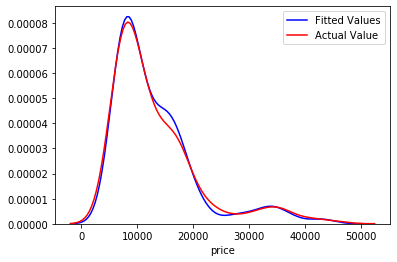

In [67]:
ax_12 = sns.distplot(regressor.predict(X_12), hist=False, color='b', label = 'Fitted Values')
sns.distplot(y, hist=False, color='r', label = 'Actual Value', ax=ax_12)
plt.show()

In [68]:
print('\t\tCOMPARE\n')
print('is smaller MSE ? ',mean_squared_error(y, regressor.predict(X_12)) < arr_MSE)
print('is greater R2 ?',regressor.score(X_12, y) > arr_R2)

		COMPARE

is smaller MSE ?  [ True  True  True  True]
is greater R2 ? [ True  True  True  True]


In [69]:
len(df[['price']].columns)

1

=> Mô hình hồi quy tuyến tính sử dụng thuật toán Random Forest cho hiệu quả tốt hơn các mô hình trước đó 

### Câu 13 : Viết hàm trả về kết quả dự đoán từ một hoặc nhiều feature thuộc 'curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore'.

In [70]:
X_13 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df[['price']]

In [71]:
def rf_func(x, y, params, random_state, predict_from):
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(n_estimators = params, random_state = random_state)
    model.fit(x, y)
    
    if len(predict_from.columns) < len(x.columns):
        n = np.abs(len(predict_from.columns) - len(x.columns))
        predict_from = pd.concat([predict_from]* (n+1), axis=1, ignore_index=True)
        y_pred = model.predict(predict_from)
    elif len(predict_from.columns) == len(x.columns):
        y_pred = model.predict(predict_from)
    else:
        print('Error! Length to predict is greater than the length of input model!')
    return model, y_pred

In [72]:
rf_func(X_12, y, 10, 0, df_12[['horsepower']])

C:\Users\aquar\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


(RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False),
 array([ 7308.9,  7308.9,  7308.9,  7155.9,  7308.9,  7308.9,  7308.9,
         7308.9,  7308.9,  7155.9,  7155.9,  7308.9,  7308.9,  7308.9,
         7308.9,  7308.9,  7308.9,  5769.4,  6168.6,  6168.6,  6044.6,
         6044.6,  7155.9,  6044.6,  6044.6,  6044.6,  7155.9,  6581.2,
         7308.9,  6035. ,  6193.4,  6035. ,  6193.4,  6193.4,  6193.4,
         6193.4,  6581.2,  6581.2,  6581.2,  6581.2,  7155.9,  7155.9,
         6193.4,  6719.4,  7308.9,  7308.9, 31232.9,  6044.6,  6044.6,
  